# import

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd 
from os import path

In [3]:
import taproc as tp
from taproc.pre_processing import *
from taproc.dataset import *
from taproc.learner import *
from taproc.feature import *

# read file

In [4]:
file_path = Path('/media/zero/dropbox/Dropbox/Data science project/kaggle/home_credit_default_risk/data')

In [5]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [6]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

# train test split from sklearn

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_trn, x_val, y_trn, y_val = train_test_split(app_train_proc, y, test_size=0.2, stratify = y)

In [22]:
def sklearn_split(df, y_df, ratio = 0.2, x_tst = None, **kargs):
    x_trn, x_val, y_trn, y_val = train_test_split(df, y_df, test_size=ratio, stratify = y_df)
    return (x_trn, x_val, y_trn, y_val, x_tst)

In [23]:
x_trn, x_val, y_trn, y_val, _ = sklearn_split(app_train_proc, y)

In [9]:
x_trn, x_val, y_trn, y_val = train_test_split(app_train_proc, y, test_size=0.2, stratify = y)

In [7]:
dataset = LGBDataset.sklearn_split(app_train_proc, y)

AttributeError: type object 'LGBDataset' has no attribute 'sklear_split'

# baseline model

In [15]:
params = {
    'task': 'train',
    'objective': 'binary',
    'n_estimators':500,
    'learning_rate':0.1,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':-1,
    'metric': 'binary_logloss'}

In [16]:
learner = LGBLearner(dataset)

In [17]:
learner.fit(params, early_stopping_rounds=50)

[1]	training's binary_logloss: 0.624724	valid_1's binary_logloss: 0.624852
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.569041	valid_1's binary_logloss: 0.569336
[3]	training's binary_logloss: 0.522627	valid_1's binary_logloss: 0.523029
[4]	training's binary_logloss: 0.48399	valid_1's binary_logloss: 0.484509
[5]	training's binary_logloss: 0.451374	valid_1's binary_logloss: 0.45202
[6]	training's binary_logloss: 0.423455	valid_1's binary_logloss: 0.424201
[7]	training's binary_logloss: 0.399644	valid_1's binary_logloss: 0.400512
[8]	training's binary_logloss: 0.379253	valid_1's binary_logloss: 0.380214
[9]	training's binary_logloss: 0.361737	valid_1's binary_logloss: 0.362778
[10]	training's binary_logloss: 0.346805	valid_1's binary_logloss: 0.347952
[11]	training's binary_logloss: 0.33391	valid_1's binary_logloss: 0.335151
[12]	training's binary_logloss: 0.322767	valid_1's binary_logloss: 0.324125
[13]	training's binary_logloss: 0.3129

[109]	training's binary_logloss: 0.23633	valid_1's binary_logloss: 0.247443
[110]	training's binary_logloss: 0.236221	valid_1's binary_logloss: 0.247416
[111]	training's binary_logloss: 0.236137	valid_1's binary_logloss: 0.247417
[112]	training's binary_logloss: 0.23602	valid_1's binary_logloss: 0.247416
[113]	training's binary_logloss: 0.235891	valid_1's binary_logloss: 0.247333
[114]	training's binary_logloss: 0.235781	valid_1's binary_logloss: 0.247348
[115]	training's binary_logloss: 0.235696	valid_1's binary_logloss: 0.247333
[116]	training's binary_logloss: 0.235597	valid_1's binary_logloss: 0.247331
[117]	training's binary_logloss: 0.235505	valid_1's binary_logloss: 0.247327
[118]	training's binary_logloss: 0.235407	valid_1's binary_logloss: 0.247348
[119]	training's binary_logloss: 0.235297	valid_1's binary_logloss: 0.247324
[120]	training's binary_logloss: 0.235212	valid_1's binary_logloss: 0.247334
[121]	training's binary_logloss: 0.235111	valid_1's binary_logloss: 0.247336
[

[216]	training's binary_logloss: 0.226723	valid_1's binary_logloss: 0.247198
[217]	training's binary_logloss: 0.226655	valid_1's binary_logloss: 0.247208
[218]	training's binary_logloss: 0.226599	valid_1's binary_logloss: 0.247218
[219]	training's binary_logloss: 0.226493	valid_1's binary_logloss: 0.247208
[220]	training's binary_logloss: 0.226401	valid_1's binary_logloss: 0.247238
[221]	training's binary_logloss: 0.226343	valid_1's binary_logloss: 0.24725
[222]	training's binary_logloss: 0.22623	valid_1's binary_logloss: 0.247246
[223]	training's binary_logloss: 0.226158	valid_1's binary_logloss: 0.247259
[224]	training's binary_logloss: 0.226095	valid_1's binary_logloss: 0.247264
[225]	training's binary_logloss: 0.225992	valid_1's binary_logloss: 0.247245
[226]	training's binary_logloss: 0.225885	valid_1's binary_logloss: 0.247216
[227]	training's binary_logloss: 0.225812	valid_1's binary_logloss: 0.247225
[228]	training's binary_logloss: 0.225715	valid_1's binary_logloss: 0.247247
[

# dendrogram

In [65]:
ddg = dendogram.from_df(x_trn)

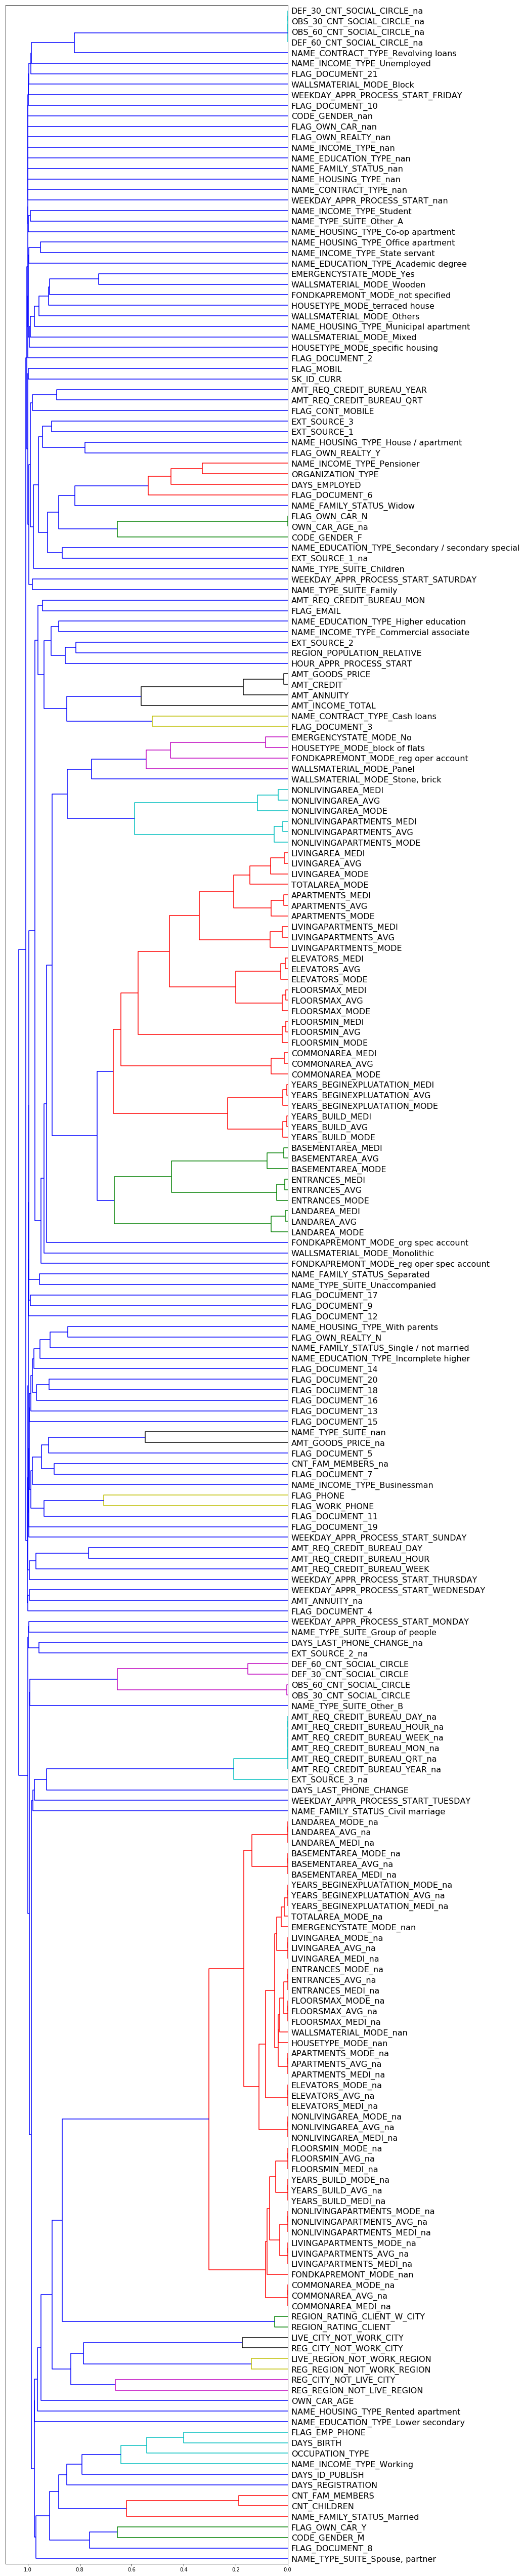

In [66]:
ddg.plot()

In [ ]:
ddg.result.head(10)

In [18]:
col_group = [['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
             ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
             ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
             ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
             ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI'],
             ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE','TOTALAREA_MODE'],
             ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
             ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
             ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
             ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
             ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
             ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
             ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
             ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
             ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
             ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
             ['LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI'],
             ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
             ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE'],
             ['LANDAREA_AVG_na', 'LANDAREA_MODE_na','LANDAREA_MEDI_na'],
             ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
             ['AMT_REQ_CREDIT_BUREAU_HOUR_na', 'AMT_REQ_CREDIT_BUREAU_DAY_na', 
              'AMT_REQ_CREDIT_BUREAU_WEEK_na', 'AMT_REQ_CREDIT_BUREAU_MON_na', 
              'AMT_REQ_CREDIT_BUREAU_QRT_na', 'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
             ['LANDAREA_AVG_na', 'LANDAREA_MODE_na', 'LANDAREA_MEDI_na'],
             ['BASEMENTAREA_AVG_na', 'BASEMENTAREA_MODE_na', 'BASEMENTAREA_MEDI_na'],
             ['YEARS_BEGINEXPLUATATION_AVG_na', 'YEARS_BEGINEXPLUATATION_MODE_na', 
              'YEARS_BEGINEXPLUATATION_MEDI_na', 'TOTALAREA_MODE_na', 'EMERGENCYSTATE_MODE_nan'],
             ['LIVINGAREA_AVG_na', 'LIVINGAREA_MODE_na', 'LIVINGAREA_MEDI_na'],
             ['ENTRANCES_AVG_na', 'ENTRANCES_MODE_na', 'ENTRANCES_MEDI_na',
              'FLOORSMAX_AVG_na', 'FLOORSMAX_MODE_na', 'FLOORSMAX_MEDI_na', 'WALLSMATERIAL_MODE_nan'],
             ['APARTMENTS_AVG_na', 'APARTMENTS_MODE_na', 'APARTMENTS_MEDI_na', 'HOUSETYPE_MODE_nan'],
             ['ELEVATORS_AVG_na', 'ELEVATORS_MODE_na', 'ELEVATORS_MEDI_na'],
             ['NONLIVINGAREA_AVG_na', 'NONLIVINGAREA_MODE_na', 'NONLIVINGAREA_MEDI_na'],
             ['FLOORSMIN_AVG_na', 'FLOORSMIN_MODE_na', 'FLOORSMIN_MEDI_na'],
             ['YEARS_BUILD_AVG_na', 'YEARS_BUILD_MODE_na', 'YEARS_BUILD_MEDI_na'],
             ['NONLIVINGAPARTMENTS_AVG_na', 'NONLIVINGAPARTMENTS_MODE_na', 'NONLIVINGAPARTMENTS_MEDI_na'],
             ['LIVINGAPARTMENTS_AVG_na', 'LIVINGAPARTMENTS_MODE_na', 'LIVINGAPARTMENTS_MEDI_na'],
             ['COMMONAREA_AVG_na', 'COMMONAREA_MODE_na', 'COMMONAREA_MEDI_na'],
             ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]

In [19]:
col_group = col_group + [i for i in x_trn.columns if i not in flat_list(col_group)]

In [20]:
col_group

[['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats'],
 ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI'],
 ['NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'TOTALAREA_MODE'],
 ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI'],
 ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE'],
 ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
 ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
 ['ENTRANCES_AVG', 'ENTR

# feature importance

In [21]:
impt = importance.from_LGBLearner(learner, col_group)

In [22]:
impt.I[:5]

,Feature,Importance
62,EXT_SOURCE_3,0.058379
61,EXT_SOURCE_2,0.044438
1,AMT_GOODS_PRICE & AMT_CREDIT & AMT_ANNUITY,0.024164
60,EXT_SOURCE_1,0.016639
40,DAYS_BIRTH,0.007307


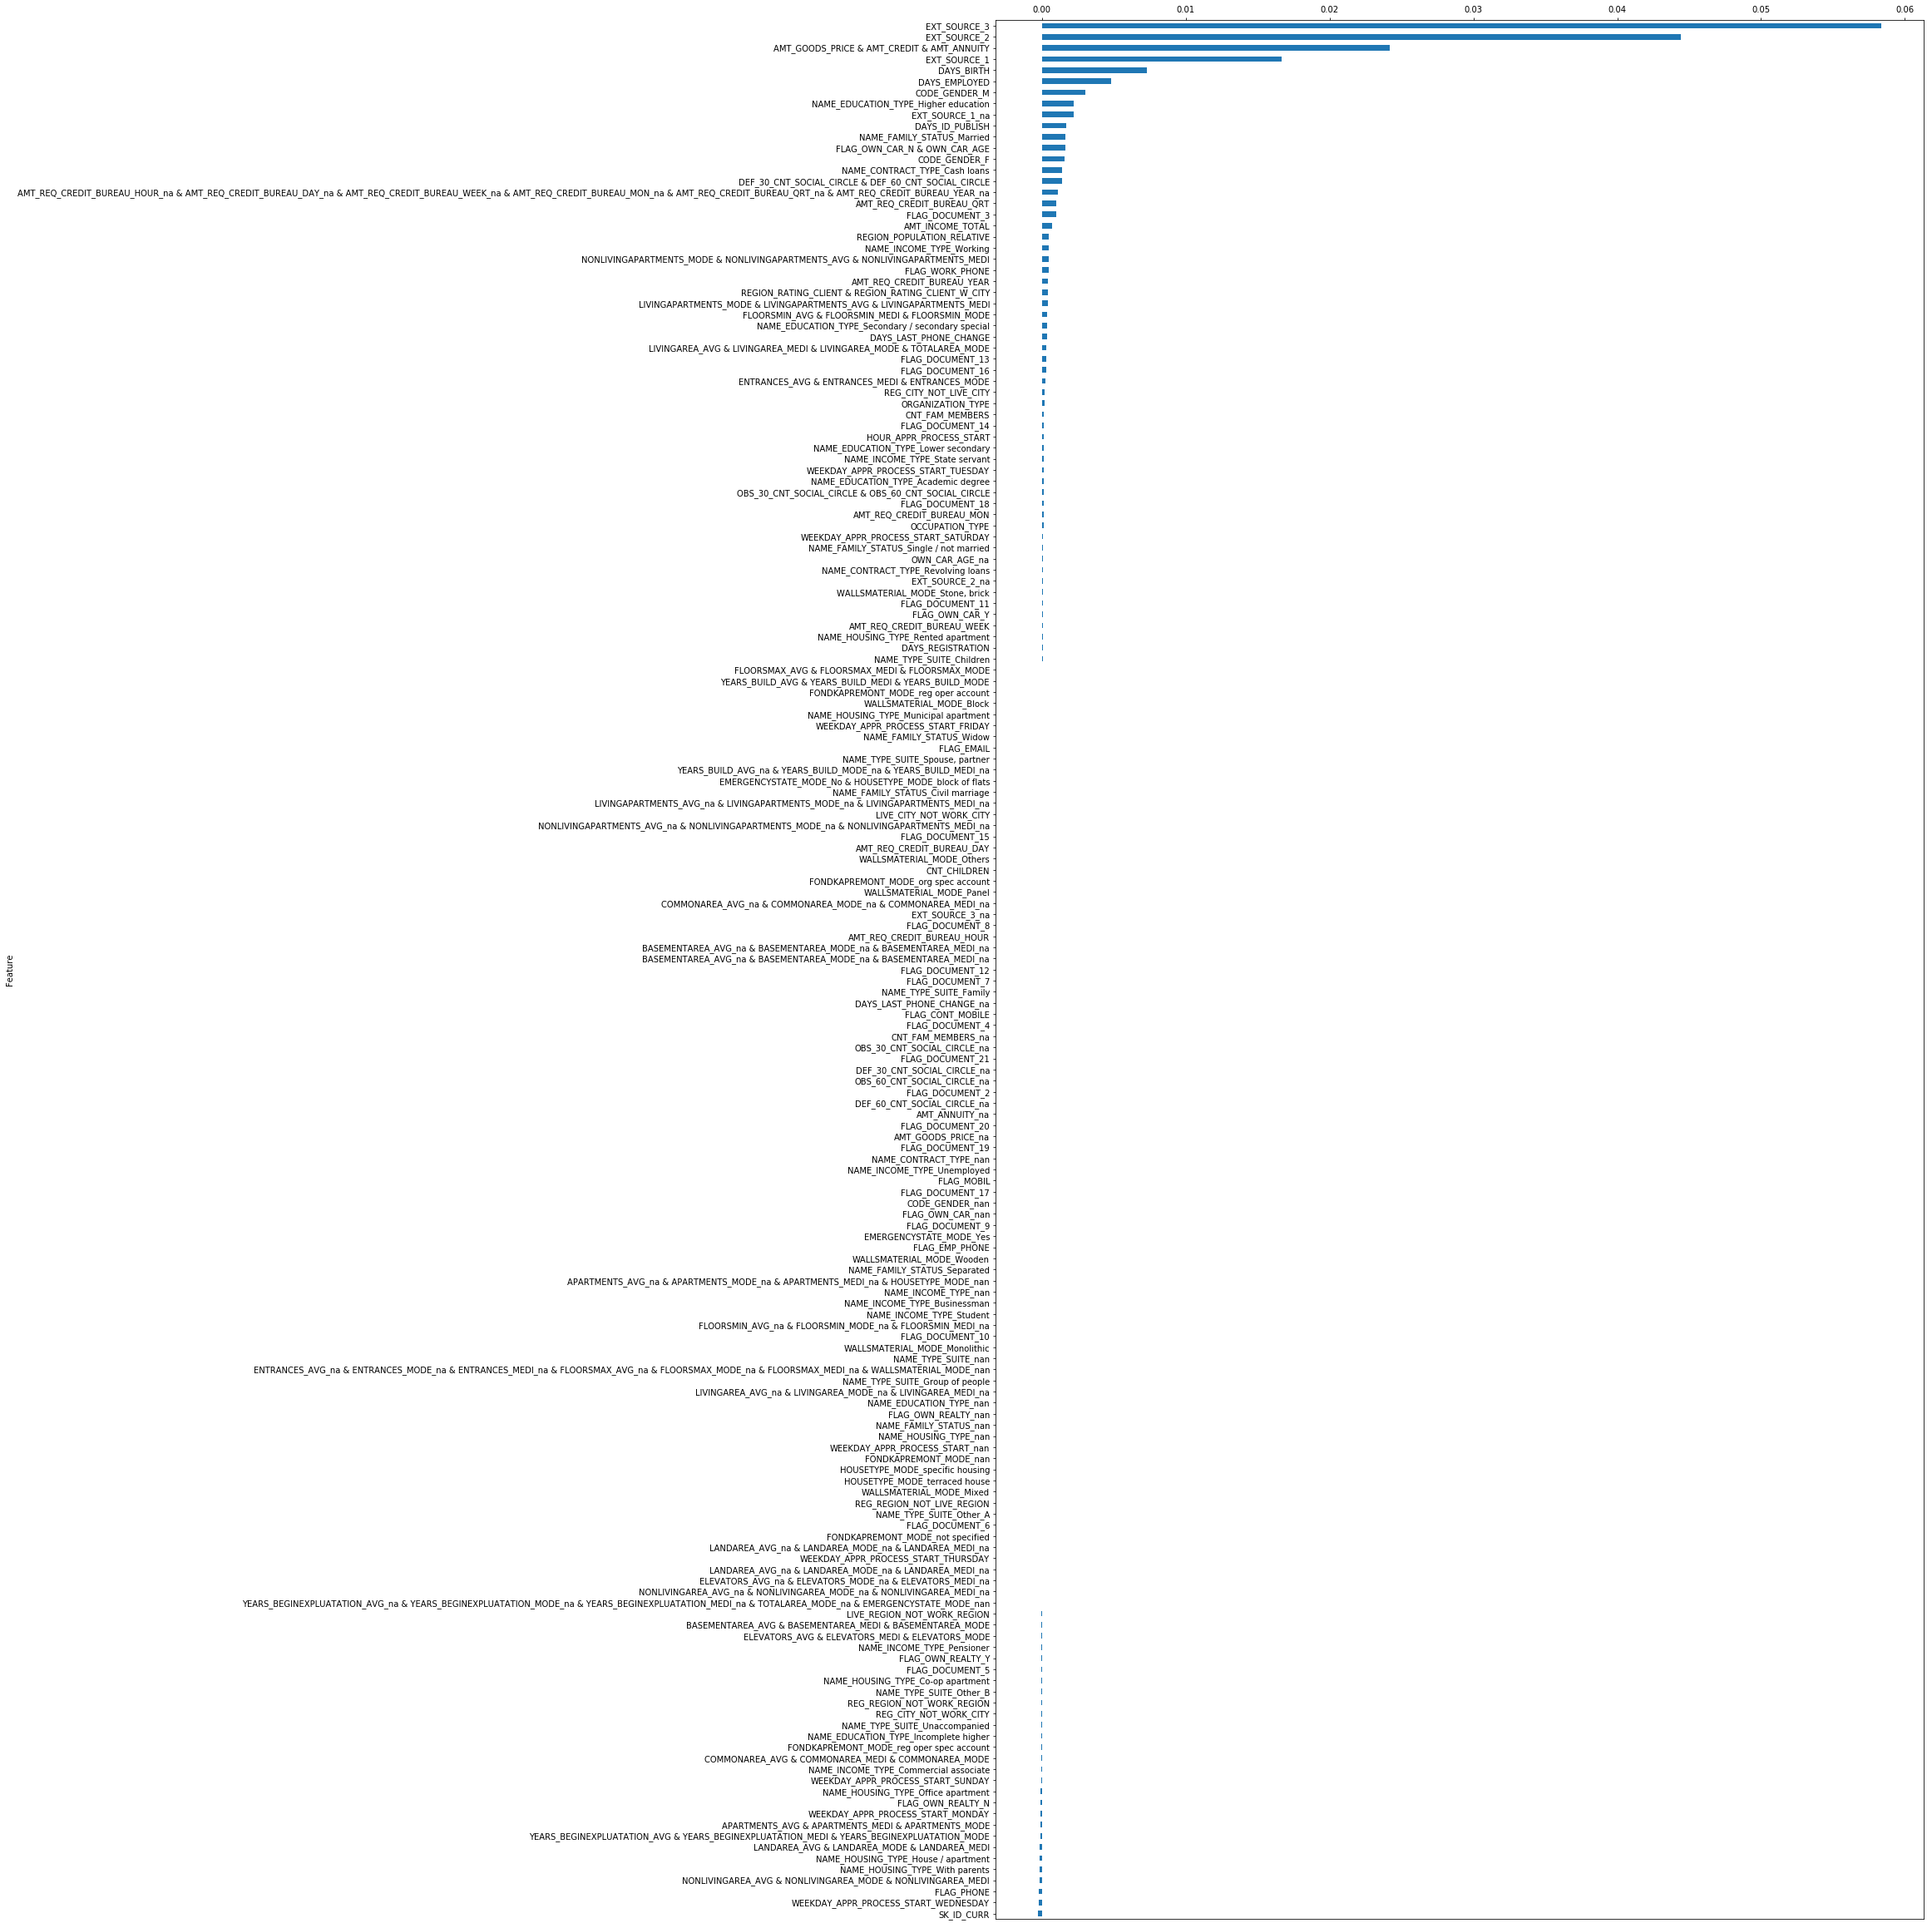

In [23]:
impt.plot()

In [24]:
impt.top(27)

[['EXT_SOURCE_3'],
 ['EXT_SOURCE_2'],
 ['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['EXT_SOURCE_1'],
 ['DAYS_BIRTH'],
 ['DAYS_EMPLOYED'],
 ['CODE_GENDER_M'],
 ['NAME_EDUCATION_TYPE_Higher education'],
 ['EXT_SOURCE_1_na'],
 ['DAYS_ID_PUBLISH'],
 ['NAME_FAMILY_STATUS_Married'],
 ['FLAG_OWN_CAR_N', 'OWN_CAR_AGE'],
 ['CODE_GENDER_F'],
 ['NAME_CONTRACT_TYPE_Cash loans'],
 ['DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
 ['AMT_REQ_CREDIT_BUREAU_HOUR_na',
  'AMT_REQ_CREDIT_BUREAU_DAY_na',
  'AMT_REQ_CREDIT_BUREAU_WEEK_na',
  'AMT_REQ_CREDIT_BUREAU_MON_na',
  'AMT_REQ_CREDIT_BUREAU_QRT_na',
  'AMT_REQ_CREDIT_BUREAU_YEAR_na'],
 ['AMT_REQ_CREDIT_BUREAU_QRT'],
 ['FLAG_DOCUMENT_3'],
 ['AMT_INCOME_TOTAL'],
 ['REGION_POPULATION_RELATIVE'],
 ['NAME_INCOME_TYPE_Working'],
 ['NONLIVINGAPARTMENTS_MODE',
  'NONLIVINGAPARTMENTS_AVG',
  'NONLIVINGAPARTMENTS_MEDI'],
 ['FLAG_WORK_PHONE'],
 ['AMT_REQ_CREDIT_BUREAU_YEAR'],
 ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'],
 ['LIVINGAPA

In [ ]:
keep_ft = flat_list(impt.top(27))

In [ ]:
x_tst_keep = app_test_proc[keep_ft]
app_train_keep = app_train_proc[keep_ft]

# split dataset

In [301]:
cons, cats = get_cons_cats(app_train_keep)

In [302]:
tst_key = x_tst_keep[cats].drop_duplicates().values
tst_key = set('~'.join([str(j) for j in i]) for i in tst_key)
app_key = app_train_keep[cats].apply(lambda x: '~'.join([str(j) for j in x.values]), axis=1)

In [303]:
mask = app_key.isin(tst_key)
x_trn = app_train_keep[~mask]
y_trn = y[~mask]
x_val_set = app_train_keep[mask]
y_val_set = y[mask]

In [304]:
def random_choose(x, pct = 2, ratio = 0.2, **kargs):
    n = x.shape[0] if random.randint(0,9) < pct else int(np.round(x.shape[0]*(ratio-0.06)))
    return x.sample(n=n, **kargs)

In [305]:
x_val = x_val_set.groupby(cats).apply(random_choose)
val_index = set([i[-1] for i in x_val.index.values])
x_val.reset_index(drop=True, inplace=True)

In [306]:
mask = x_val_set.index.isin(val_index)
y_val = y_val_set[mask]
x_trn = pd.concat([x_trn, val_set[~mask]])

# describe

In [261]:
cons[:5]

['EXT_SOURCE_3',
 'EXT_SOURCE_2',
 'EXT_SOURCE_1',
 'AMT_GOODS_PRICE',
 'AMT_CREDIT']

In [262]:
cats[:5]

['CODE_GENDER_M',
 'NAME_EDUCATION_TYPE_Higher education',
 'CODE_GENDER_F',
 'AMT_REQ_CREDIT_BUREAU_HOUR_na',
 'AMT_REQ_CREDIT_BUREAU_DAY_na']

In [307]:
x_val_set.shape

(248120, 44)

In [265]:
list(tst_key)[:5]

['1~0~0~True~True~True~True~True~True~0~0~0.0~0.0~0~1~True~0~0~2~2~1~False~0.1667~0.0',
 '0~0~1~False~False~False~False~False~False~1~1~0.0~0.0~1~0~True~1~0~2~2~0~True~0.1667~0.0',
 '1~1~0~False~False~False~False~False~False~0~1~0.0~0.0~0~1~False~1~0~2~2~0~False~0.125~0.0',
 '1~0~0~False~False~False~False~False~False~0~1~1.0~1.0~0~1~False~1~0~1~1~1~False~0.0417~0.0',
 '1~0~0~True~True~True~True~True~True~1~1~1.0~0.0~1~0~True~1~0~2~2~0~True~0.1667~0.0']

In [294]:
val_index[:5]

[264913, 50074, 209922, 285119, 140840]